In [1]:

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt


In [2]:

# ------------------------------------------------------------
# 2. UPDATED PARAMETERS (Your requested changes)
# ------------------------------------------------------------

max_features = 10000      # (7) Changed: number of features (vocab size)
maxlen = 200              # (1) Changed: sequence length

learning_rate = 0.0005    # (3) Changed: learning rate
batch_size = 128          # (3) Changed: batch size
activation_function = 'relu'  # (3) Changed: activation function for Dense layer

# ------------------------------------------------------------
# 3. Load IMDB dataset
# ------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# ------------------------------------------------------------
# 4. Pad sequences to fixed length
# ------------------------------------------------------------
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# ------------------------------------------------------------
# 5. Build Improved Model (All requested updates)
# ------------------------------------------------------------



In [4]:
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, 64))

# (4) Add dropout layer
model.add(Dropout(0.3))

# (5) Add LSTM instead of SimpleRNN to improve accuracy
# (6) Increased hidden units
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))

# (4) Add an extra Dense layer
model.add(Dense(64, activation=activation_function))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# ------------------------------------------------------------
# 6. Compile Model with updated metrics and hyperparameters
# ------------------------------------------------------------



In [5]:
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]   # (2) Updated metrics
)

# ------------------------------------------------------------
# 7. Train the model with updated batch size and validation split
# ------------------------------------------------------------

history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=batch_size,
    validation_split=0.2   # (8) Validation split remains 0.2
)

# ------------------------------------------------------------
# 8. Evaluate the model
# ------------------------------------------------------------

test_loss, test_acc = model.evaluate(x_test, y_test)


# ------------------------------------------------------------
# 9. Plot training and validation accuracy
# ------------------------------------------------------------


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5987 - loss: 0.6410 - precision: 0.5846 - recall: 0.7970 - val_accuracy: 0.8464 - val_loss: 0.3629 - val_precision: 0.8245 - val_recall: 0.8753
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.8735 - loss: 0.3096 - precision: 0.8672 - recall: 0.8816 - val_accuracy: 0.8734 - val_loss: 0.3109 - val_precision: 0.8775 - val_recall: 0.8643
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9193 - loss: 0.2113 - precision: 0.9191 - recall: 0.9190 - val_accuracy: 0.8740 - val_loss: 0.3193 - val_precision: 0.8362 - val_recall: 0.9263
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.8622 - loss: 0.3371 - precision: 0.8235 - recall: 0.9170


ValueError: too many values to unpack (expected 2)

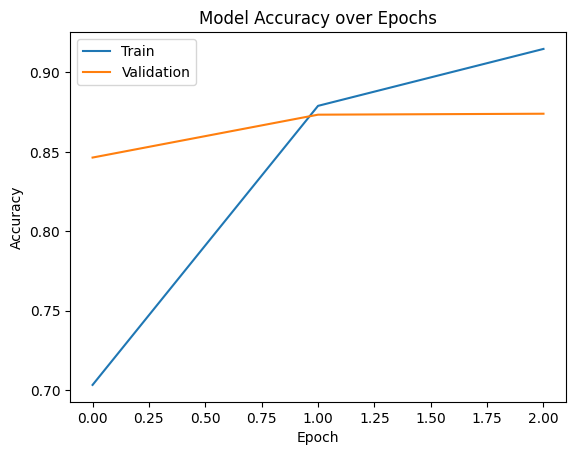

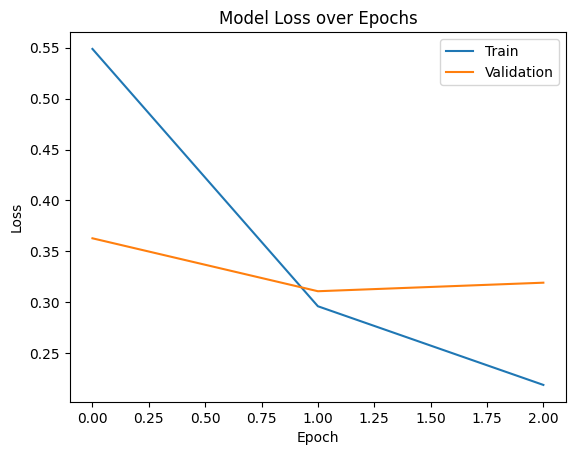

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted Sentiment: Negative


In [6]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# ------------------------------------------------------------
# 10. Predict sentiment on a sample review
# ------------------------------------------------------------

sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")
